# Time Series Analysis in Python: Master Applied Data Analysis
Weekly challenge: Week 6  
Date: 8/29/2022

## 9

In [1]:
import yfinance as yf

In [2]:
# Time series data for Tesla
df = yf.download(tickers = 'TSLA', start = '2019-01-01', end = '2019-12-31', progress = False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,22.356667,105127500


In [3]:
# Time series data for Facebook
df = yf.download(tickers = 'META', start = '2019-01-01', end = '2019-12-31', progress = False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,128.990005,137.509995,128.559998,135.679993,135.679993,28146200
2019-01-03,134.690002,137.169998,131.119995,131.740005,131.740005,22717900
2019-01-04,134.009995,138.000000,133.750000,137.949997,137.949997,29002100
2019-01-07,137.559998,138.869995,135.910004,138.050003,138.050003,20089300
2019-01-08,139.889999,143.139999,139.539993,142.529999,142.529999,26263800


In [4]:
# Time series data for Amazon
df = yf.download(tickers = 'AMZN', start = '2019-01-01', end = '2019-12-31', progress = False)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,73.260002,77.667999,73.046501,76.956497,76.956497,159662000
2019-01-03,76.000504,76.900002,74.855499,75.014000,75.014000,139512000
2019-01-04,76.500000,79.699997,75.915497,78.769501,78.769501,183652000
2019-01-07,80.115501,81.727997,79.459503,81.475502,81.475502,159864000
2019-01-08,83.234497,83.830498,80.830498,82.829002,82.829002,177628000


## 10

In [5]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [6]:
# Reading the dataset
data = pd.read_csv(r'C:\Users\unpat\_Projects\Challenge_AprojectAweek\Week_06\Customers_in_a_Shop.csv', header = None)

In [7]:
data.head(3)

,0,1
0,1949-01,114.0
1,1949-02,120.0
2,1949-03,134.0


In [8]:
# Assigning names to the columns
data.columns = ['Date','Customers']

In [9]:
data.head(3)

,Date,Customers
0,1949-01,114.0
1,1949-02,120.0
2,1949-03,134.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       144 non-null    object 
 1   Customers  140 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [11]:
# Converting Date column from object to datetime
data['Date'] = pd.to_datetime(data['Date'], format = "%Y-%m")

In [12]:
data.head(3)

,Date,Customers
0,1949-01-01,114.0
1,1949-02-01,120.0
2,1949-03-01,134.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       144 non-null    datetime64[ns]
 1   Customers  140 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 2.4 KB


In [14]:
# Setting index to Date
data = data.set_index('Date')

In [15]:
data.head(3)

,Customers
Date,
1949-01-01,114.0
1949-02-01,120.0
1949-03-01,134.0


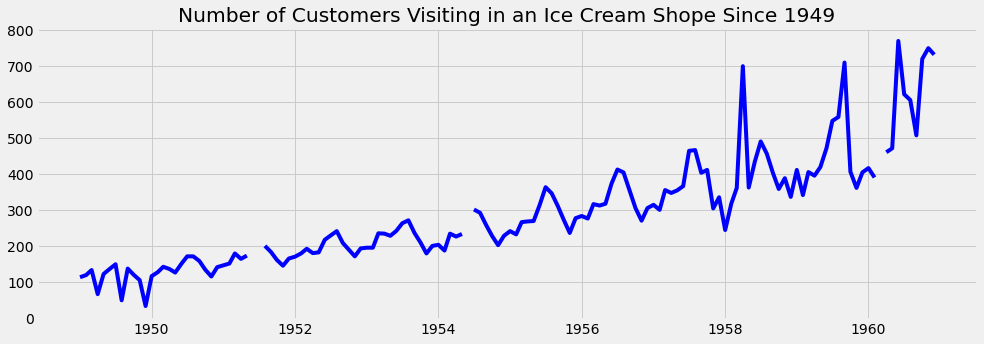

In [16]:
# Ckecking the missing values
plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(data, color = 'blue')
plt.title("Number of Customers Visiting in an Ice Cream Shope Since 1949")
plt.show()

## Imputing missing values in a time series

-- Mean imputation  
-- Last observation carried forward: Impute missing values with the previous value in the data  
-- Linear interpolation: Draw a straight line joining the previous and next points of the missing values  
-- Seasonal interpolation: Impute the missing values with the average of corresponding data points from the previous seasonal data and the next seasonal data

### Mean imputation

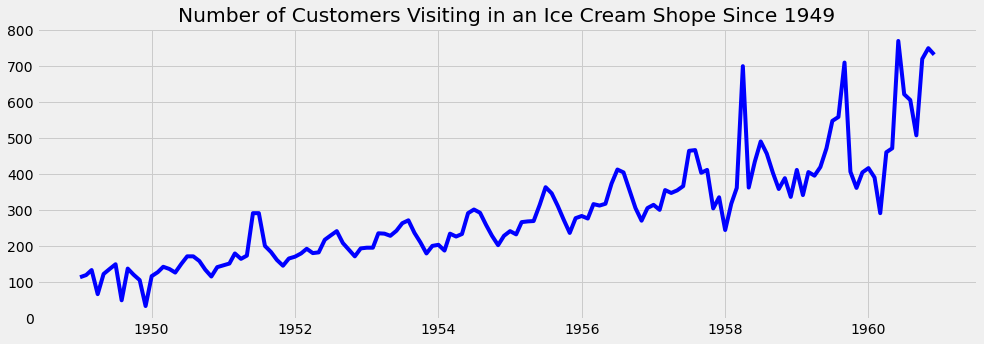

In [18]:
plt.rcParams['figure.figsize'] = (15, 5)
data['Customers_mean'] = data['Customers'].fillna(data['Customers'].mean())
plt.plot(data['Customers_mean'], color = 'blue')
plt.title("Number of Customers Visiting in an Ice Cream Shope Since 1949")
plt.show()

### Last observation carried forward

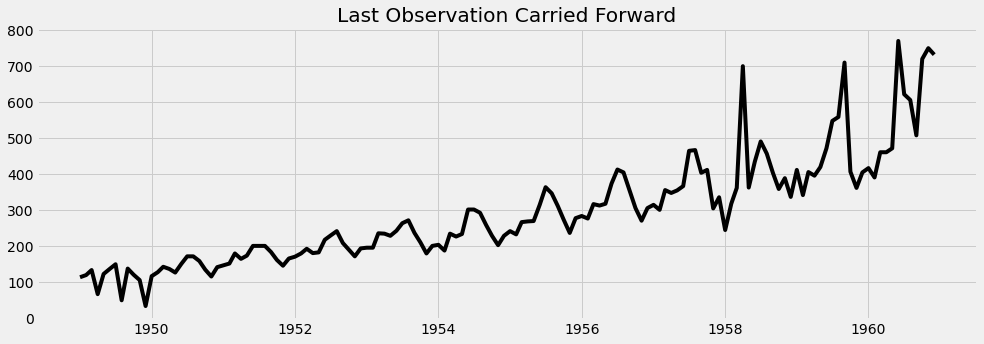

In [19]:
plt.rcParams['figure.figsize'] = (15, 5)
data['Customers_locf'] = data['Customers'].bfill()
plt.plot(data['Customers_locf'], color = 'black')
plt.title("Last Observation Carried Forward")
plt.show()

### Linear interpolation

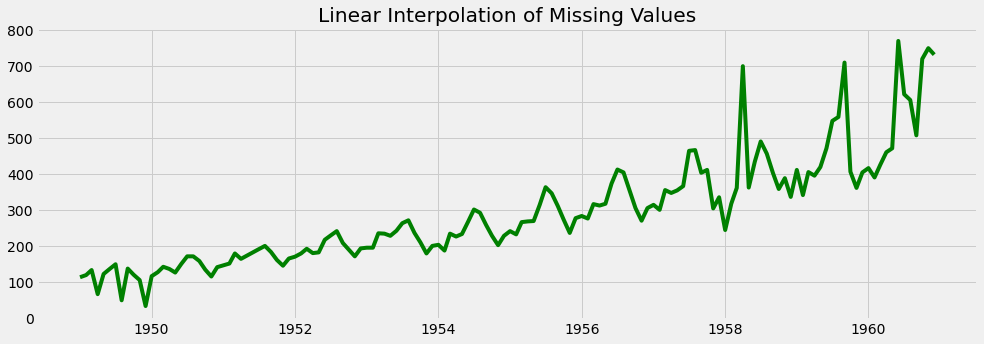

In [20]:
plt.rcParams['figure.figsize'] = (15, 5)
data['Customers_linear'] = data['Customers'].interpolate(method = 'linear')
plt.plot(data['Customers_linear'], color = 'green')
plt.title("Linear Interpolation of Missing Values")
plt.show()

### Seasonal interpolation

In [21]:
# Find the dates where there are missing values
data.index[data['Customers'].isnull()]

DatetimeIndex(['1951-06-01', '1951-07-01', '1954-06-01', '1960-03-01'], dtype='datetime64[ns]', name='Date', freq=None)

In [22]:
data.head(3)

,Customers,Customers_mean,Customers_locf,Customers_linear
Date,,,,
1949-01-01,114.0,114.0,114.0,114.0
1949-02-01,120.0,120.0,120.0,120.0
1949-03-01,134.0,134.0,134.0,134.0


In [23]:
data.loc['1951-06']

,Customers,Customers_mean,Customers_locf,Customers_linear
Date,,,,
1951-06-01,NaN,291.878571,201.0,183.0


In [24]:
data['1949-06':'1950-06':12]

,Customers,Customers_mean,Customers_locf,Customers_linear
Date,,,,
1949-06-01,137.0,137.0,137.0,137.0
1950-06-01,151.0,151.0,151.0,151.0


In [25]:
temp = data['1949-06':'1950-06':12].sum()
temp

Customers           288.0
Customers_mean      288.0
Customers_locf      288.0
Customers_linear    288.0
dtype: float64

In [26]:
data['1949-06':'1950-06':12].shape

(2, 4)

In [27]:
data['1949-06':'1950-06':12].shape[0]

2

In [28]:
data['1949-06':'1950-06':12].sum()/data['1949-06':'1950-06':12].shape[0]

Customers           144.0
Customers_mean      144.0
Customers_locf      144.0
Customers_linear    144.0
dtype: float64

In [29]:
data.loc['1951-06'].fillna((data['1949-06':'1950-06':12].sum())/data['1949-06':'1950-06':12].shape[0], inplace = True)
data.loc['1951-07'].fillna((data['1949-07':'1950-07':12].sum())/data['1949-07':'1950-07':12].shape[0], inplace = True)
data.loc['1954-06'].fillna((data['1949-06':'1953-06':12].sum())/data['1949-06':'1953-06':12].shape[0], inplace = True)
data.loc['1960-03'].fillna((data['1949-03':'1959-03':12].sum())/data['1949-03':'1959-03':12].shape[0], inplace = True)

In [30]:
data.isnull().sum()

Customers           0
Customers_mean      0
Customers_locf      0
Customers_linear    0
dtype: int64

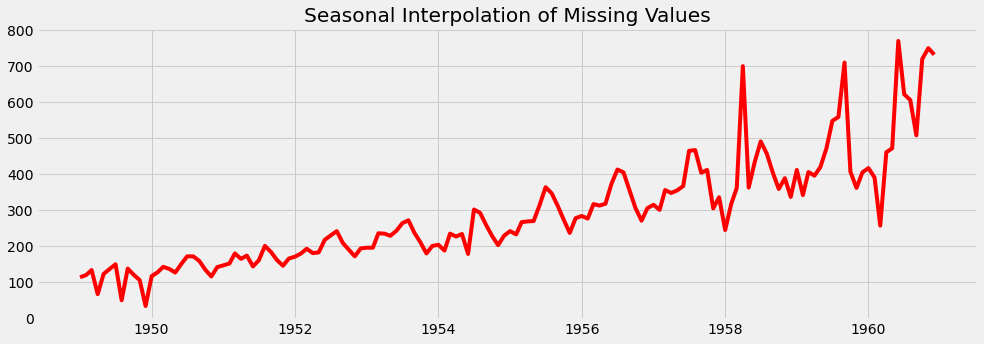

In [31]:
# Seasonal interpolation
plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(data['Customers'], color = 'red')
plt.title("Seasonal Interpolation of Missing Values")
plt.show()

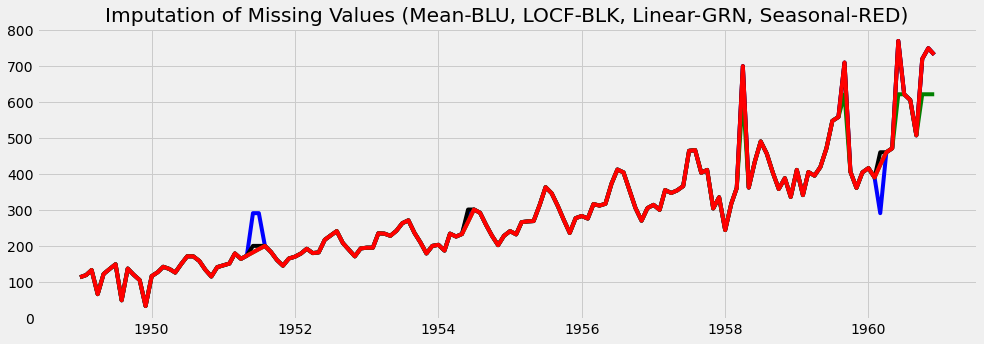

In [70]:
plt.rcParams['figure.figsize'] = (15, 5)

plt.plot(data['Customers_mean'], color = 'blue') # Mean imputation
plt.plot(data['Customers_locf'], color = 'black') # Last observation carried forward
plt.plot(data['Customers_linear'], color = 'green') # Linear interpolation
plt.plot(data['Customers'], color = 'red') # Seasonal interpolation

plt.title("Imputation of Missing Values (Mean-BLU, LOCF-BLK, Linear-GRN, Seasonal-RED)")
plt.show()

**Comments:**  
Linear interpolation gives better results so will use it in this dataset.

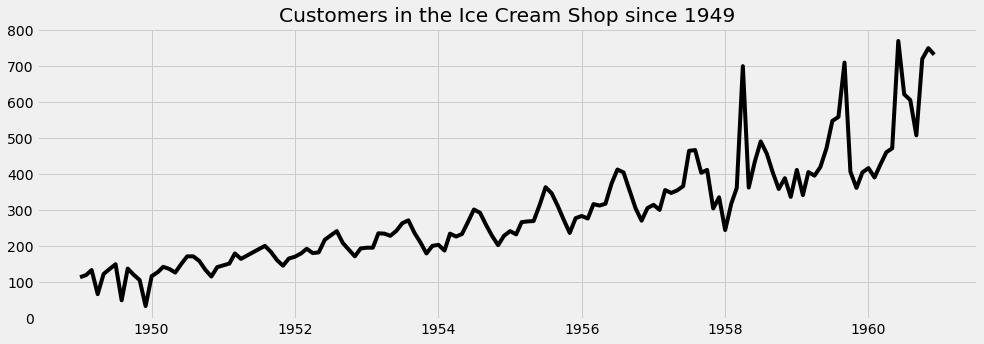

In [33]:
# Linear interpolation for the data
plt.rcParams['figure.figsize'] = (15, 5)
data['Customers'] = data['Customers_linear']
plt.plot(data['Customers'], color = 'black')
plt.title("Customers in the Ice Cream Shop since 1949")
plt.show()

## 11

## Ckecking for outliers

In [34]:
import seaborn as sns

<AxesSubplot:xlabel='Customers_linear'>

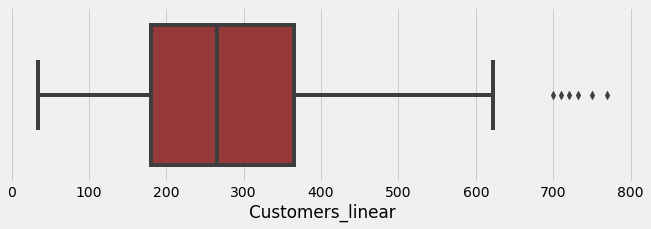

In [35]:
# Box plot
plt.rcParams['figure.figsize'] = (10, 3)
sns.boxplot(data['Customers_linear'], color = 'brown')

In [36]:
data[data['Customers_linear'] >= 700]

,Customers,Customers_mean,Customers_locf,Customers_linear
Date,,,,
1958-04-01,700.0,700.0,700.0,700.0
1959-09-01,710.0,710.0,710.0,710.0
1960-06-01,770.0,770.0,770.0,770.0
1960-10-01,720.0,720.0,720.0,720.0
1960-11-01,750.0,750.0,750.0,750.0
1960-12-01,732.0,732.0,732.0,732.0


In [37]:
# Outliers treatment
# Capping outliers
data['Customers_linear'].loc[(data['Customers_linear'] >= 700)] = 622

In [38]:
data.isnull().sum()

Customers           0
Customers_mean      0
Customers_locf      0
Customers_linear    0
dtype: int64

<AxesSubplot:xlabel='Customers_linear'>

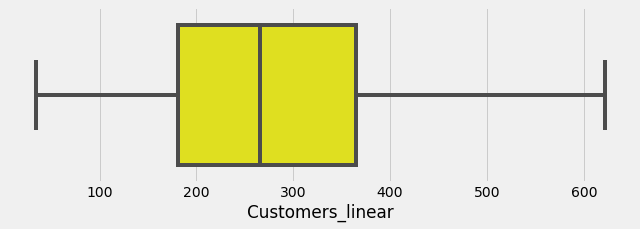

In [39]:
# Box plot after capping the outliers
plt.rcParams['figure.figsize'] = (10, 3)
sns.boxplot(data['Customers_linear'], color = 'yellow')

## 12

## Time series decomposition  
-- Additive seasonal decomposition [y(t) = level + trend = seasonality + noise]  
-- Multiplicative seasonal decomposition [y(t) = level * trend * seasonality * noise]  
-- Use additive model when the magnitude of seasonality doesn't change in relation to time  
-- Use multiplicative model when the magnitude of seasonal pattern in the data depends on the magnitude of data

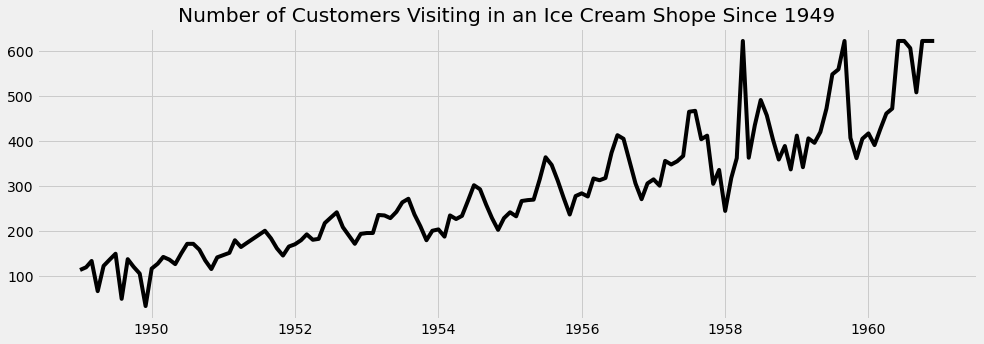

In [40]:
plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(data['Customers_linear'], color = 'black')
plt.title("Number of Customers Visiting in an Ice Cream Shope Since 1949")
plt.show()

**Comments:**  
We will use multiplicative model because the magnitude of seasonal component increases (changes) over time.

In [41]:
# Import statsmodels for time series composition
#import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import statsmodels as sm

### Checking additive seasonal model

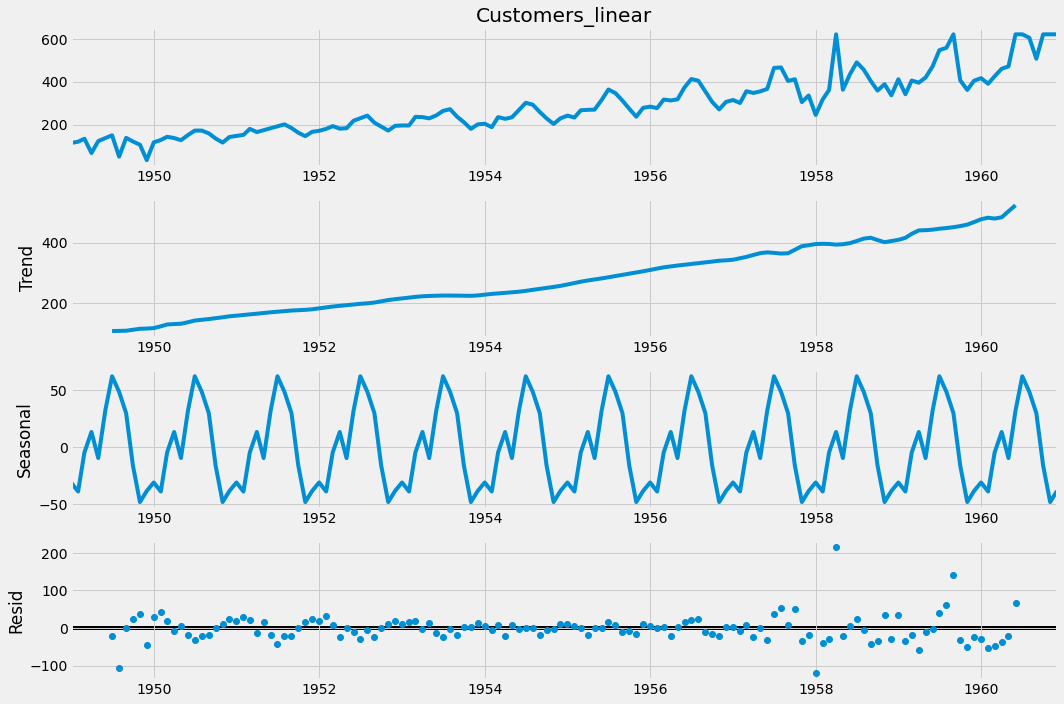

In [42]:
plt.rcParams['figure.figsize'] = (15, 10)

decomposition = sm.tsa.seasonal.seasonal_decompose(data['Customers_linear'], model = 'additive')
decomposition.plot()

plt.show()

**Comments:**  
In residual, we can see that there is some pattern. We can do better using the multiplicative decomposition method.

### Multiplicative seasonal decomposition model

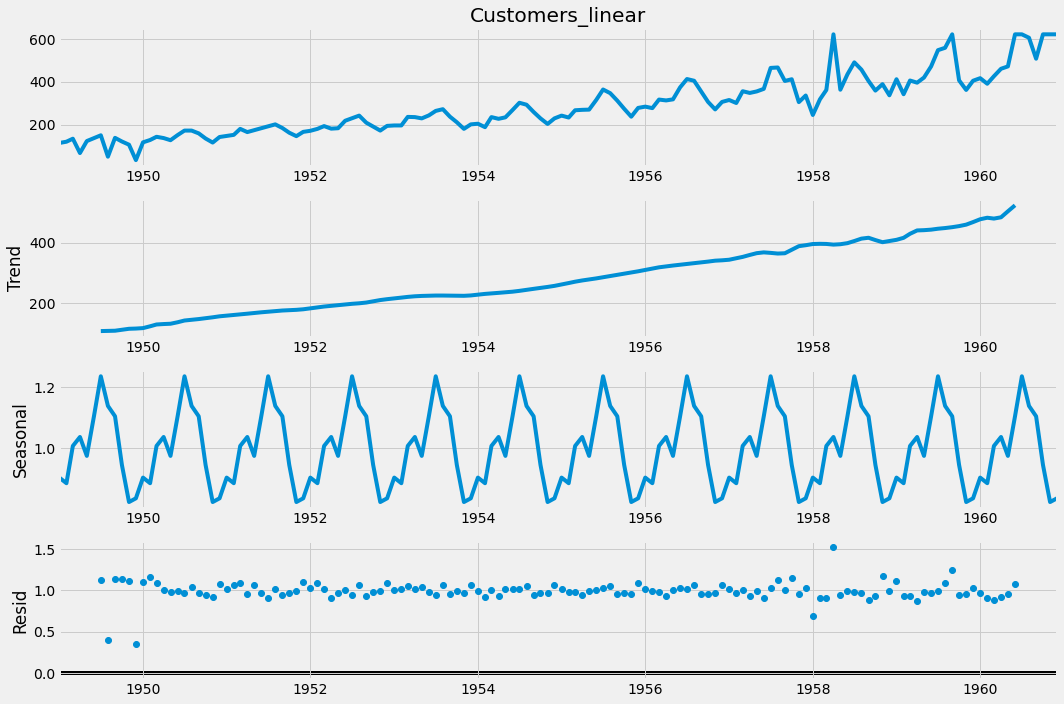

In [43]:
plt.rcParams['figure.figsize'] = (15, 10)

decomposition = sm.tsa.seasonal.seasonal_decompose(data['Customers_linear'], model = 'multiplicative')
decomposition.plot()

plt.show()

**Comments:**  
Seasonality captures the overall pattern of the time series data. There is no specific pattern in the residual part which means that everything is captured by the trend and seasonality components of the time series data.  

We can go with the multiplicative seasonal decomposition because it captures most of the pattern from our time series data.

## 13

## Cross validation in time series

Two types of cross validation in time series  
-- One-step validation: Test data is exactly after the train data  
-- Multi-step validation: Test data is not exactly after the train data

### Splitting train and test data

In [44]:
length_train = 115
train = data.iloc[:length_train, :]
test = data.iloc[length_train:, :]

In [45]:
print(train.shape)

(115, 4)


In [48]:
train.tail()

,Customers,Customers_mean,Customers_locf,Customers_linear
Date,,,,
1958-03-01,362.0,362.0,362.0,362.0
1958-04-01,700.0,700.0,700.0,622.0
1958-05-01,363.0,363.0,363.0,363.0
1958-06-01,435.0,435.0,435.0,435.0
1958-07-01,491.0,491.0,491.0,491.0


In [46]:
print(test.shape)

(29, 4)


## 15

## Smoothing techniques to forecast time series data
-- Naive forecasting: Last historical data, extrapolate for all future values without adjusting for causal factors  
-- Simple average method: Future predictions as the average of all the historical data

### Naive forecasting

In [53]:
y_naive = test.copy()
y_naive['forecasted_naive'] = train['Customers'][length_train - 1]

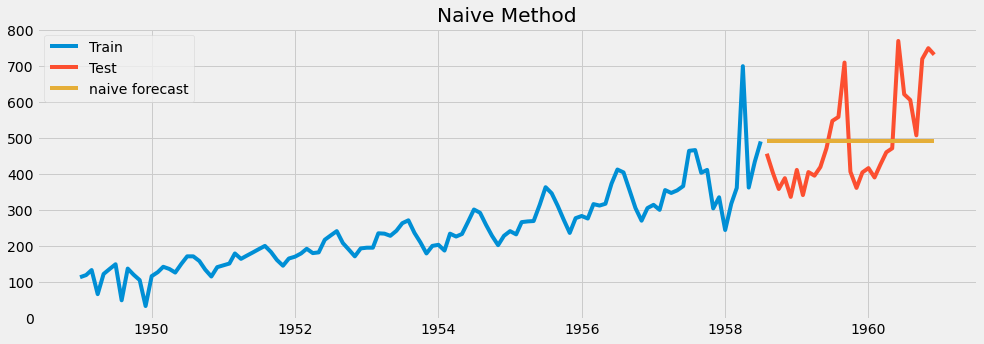

In [56]:
plt.rcParams['figure.figsize'] = (15, 5)

#plt.plot(train['Customers'], label = 'Train', color = 'blue')
#plt.plot(test['Customers'], label = 'Test', color = 'green')
#plt.plot(y_naive['forecasted_naive'], label = 'naive forecast', color = 'red')

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_naive['forecasted_naive'], label = 'naive forecast')

plt.legend()
plt.title('Naive Method')
plt.show()

Date
1949-01-01    114.0
1949-02-01    120.0
1949-03-01    134.0
1949-04-01     67.0
1949-05-01    123.0
              ...  
1958-03-01    362.0
1958-04-01    700.0
1958-05-01    363.0
1958-06-01    435.0
1958-07-01    491.0
Name: Customers, Length: 115, dtype: float64

### Simple average method  
Fails to capture any trend or seasonality from the time series data

In [58]:
y_avg = test.copy()
y_avg['forecasted_avg'] = train['Customers'].mean()

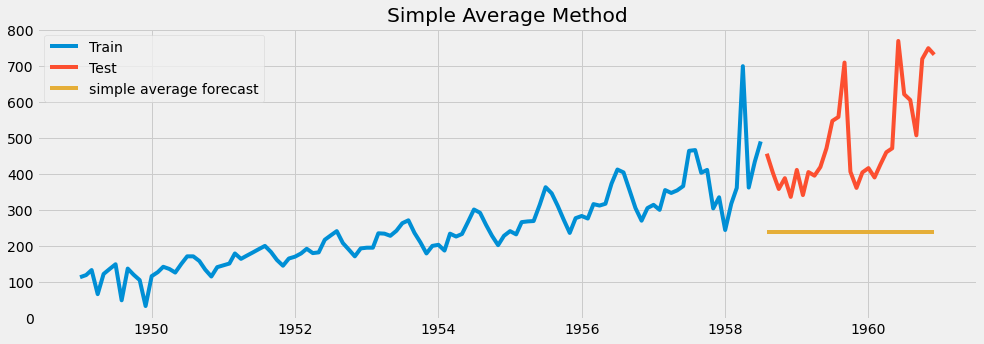

In [59]:
plt.rcParams['figure.figsize'] = (15, 5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_avg['forecasted_avg'], label = 'simple average forecast')

plt.legend()
plt.title('Simple Average Method')
plt.show()

## 16

## Metrics for time series forecasting

Evaluation metrics to evaluate the accuracy and efficiency of a time series  
-- 1. Mean forecast error (MFE)  
-- 2. Mean absolutely error (MAE)  
-- 3. Mean absolutely percentage error (MAPE)  
-- 4. Mean square error (MSE)  
-- 5. Root mean square error (RMSE)

**1. Mean forecast error (MFE)**  
Shows deviation of the forecast from the actual demand

**2. Mean absolutely error (MAE)**  
Absolute values of the diff. between actual and forecasted values

**3. Mean absolutely percentage error (MAPE)**  
% of mean absolutely error

**4. Mean square error (MSE)**  
Square the diff., sum up, take average

**5. Root mean square error (RMSE)**  
Square root of mean square error

## 17

## Simple moving average forecasting technique  
Future prediction = average of moving window

In [67]:
y_moving = data.copy()

window = 9 # 9 months
y_moving['moving_average_forecast'] = data['Customers'].rolling(window).mean()
y_moving['moving_average_forecast'][length_train:] = y_moving['moving_average_forecast'][length_train-1]

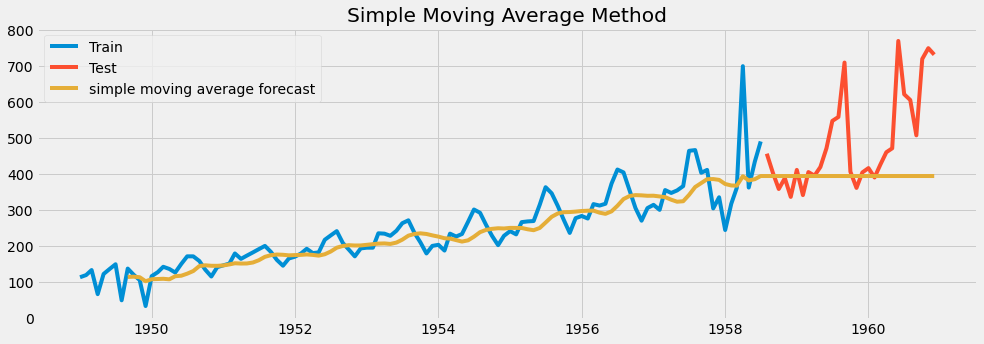

In [72]:
plt.rcParams['figure.figsize'] = (15, 5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_moving['moving_average_forecast'], label = 'simple moving average forecast')

plt.legend()
plt.title('Simple Moving Average Method')
plt.show()

## 18

## Simple exponential smoothing  

Accounts for trend in a time series

In [74]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [75]:
model = SimpleExpSmoothing(train['Customers'])
model_fit = model.fit(smoothing_level = 0.2)
model_fit.params

y_exp = test.copy()
y_exp['Exponential_forecast'] = model_fit.forecast(24)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


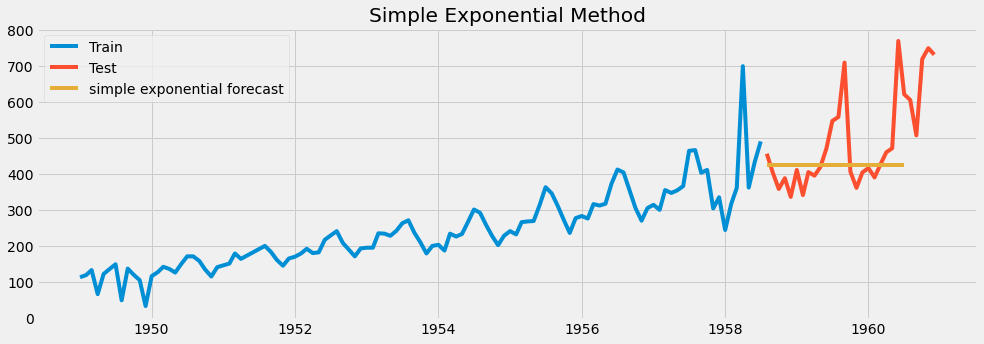

In [76]:
plt.rcParams['figure.figsize'] = (15, 5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_exp['Exponential_forecast'], label = 'simple exponential forecast')

plt.legend()
plt.title('Simple Exponential Method')
plt.show()

## 19
## Holt and Holt Winter Exponential Smoothing  

### Holt Exponential Smoothing

Captures the **level** and **trend** of time series in the forecasting

In [78]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [79]:
model = ExponentialSmoothing(train['Customers'], seasonal_periods = 12, trend = 'multiplicative')
model_fit = model.fit(smoothing_level = 0.2, smoothing_slope = 0.04)
model_fit.params

y_holtexponential = test.copy()
y_holtexponential['Holtexponential_forecast'] = model_fit.forecast(24)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


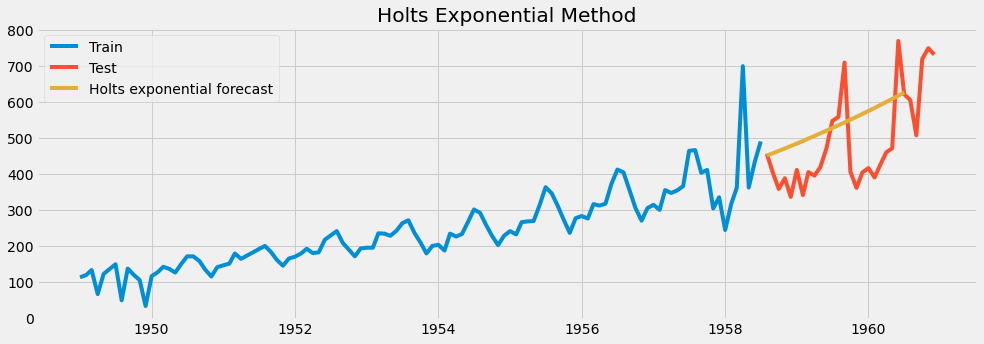

In [80]:
plt.rcParams['figure.figsize'] = (15, 5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_holtexponential['Holtexponential_forecast'], label = 'Holts exponential forecast')

plt.legend()
plt.title('Holts Exponential Method')
plt.show()

### Holt Winter Exponential Smoothing

Captures the **level,** **trend,** and **seasonality** of time series in the forecasting

In [93]:
model = ExponentialSmoothing(train['Customers'], seasonal_periods = 12, trend = 'multiplicative', seasonal = 'additive')
model_fit = model.fit(smoothing_level = 0.2, smoothing_slope = 0.04)
model_fit.params

y_holtwinter = test.copy()
y_holtwinter['Holtwinter_forecast'] = model_fit.forecast(12)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


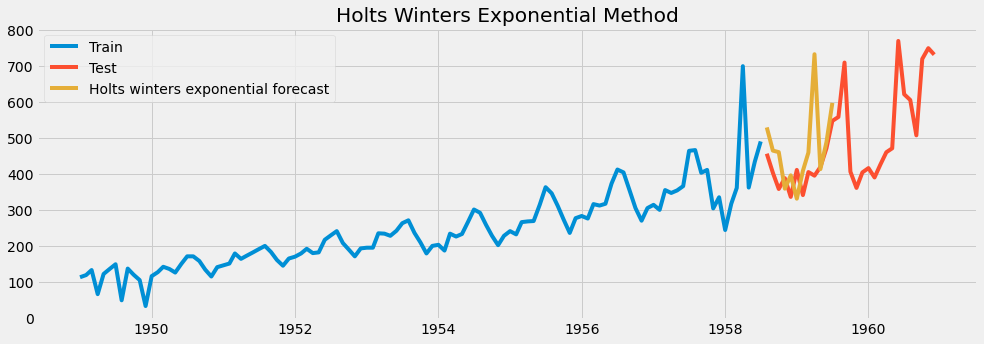

In [94]:
plt.rcParams['figure.figsize'] = (15, 5)

plt.plot(train['Customers'], label = 'Train')
plt.plot(test['Customers'], label = 'Test')
plt.plot(y_holtwinter['Holtwinter_forecast'], label = 'Holts winters exponential forecast')

plt.legend()
plt.title('Holts Winters Exponential Method')
plt.show()

## 21
## Auto Regressive Models  
-- Predicts future behaviour based on the past behaviour  
-- Used when there is some correlation between values in a time series and the values that precede and succeed them  
-- We use regression model to formulate a time series problem  
-- Past observations are use to forecast future observations

**Assumptions for AR model:**  
* Stationarity
* AutoCorrelation

## Checking for stationarity  
Statistical properties of a process generating a time series do not change over time

The following 3 properties remains the same irrespective of the time for a stationary time series  
-- Mean  
-- Variance  
-- Covariance